In [0]:
"""
network.py
~~~~~~~~~~
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print "Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test)
            else:
                print "Epoch {0} complete".format(j)

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
return sigmoid(z)*(1-sigmoid(z))

In [0]:
#importing dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import gzip
import numpy as np
import random
try:
    import cPickle as pickle
except:
    import pickle

# Load Data

In [2]:
!git clone https://github.com/mnielsen/neural-networks-and-deep-learning.git

Cloning into 'neural-networks-and-deep-learning'...
remote: Enumerating objects: 1163, done.
remote: Total 1163 (delta 0), reused 0 (delta 0), pack-reused 1163
Receiving objects: 100% (1163/1163), 20.42 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (577/577), done.


In [3]:
%cd neural-networks-and-deep-learning/

/content/neural-networks-and-deep-learning


In [0]:
"""Class whose aim is to load data from the serialization file, and give it a
format to can be used in our code"""
class DataLoader(object):
  
  def load_data(self):
    with gzip.open('data/mnist.pkl.gz','rb') as ff :
        u = pickle._Unpickler( ff )
        u.encoding = 'latin1'
        training_data, validation_data, test_data= u.load()
    return (training_data, validation_data, test_data)
  
  def load_data_wrapper(self):
    tr_d, va_d, te_d = self.load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [ self.vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)
  
  def vectorized_result(self, j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [0]:
data_loader = DataLoader()
training_data, validation_data, test_data = data_loader.load_data_wrapper()
training_data, validation_data, test_data = list(training_data), \
list(validation_data), list(test_data)

(784, 1)


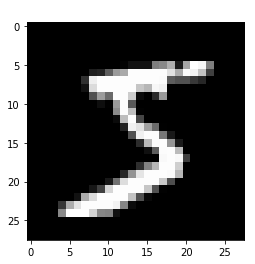

In [6]:
#inspecting the data
print(training_data[0][0].shape)
img = np.reshape(training_data[0][0], (28,28))
plt.imshow(img, cmap='gray')
title_obj = plt.title('Número: {}'.format(np.argmax(training_data[0][1])))
plt.setp(title_obj, color='w')  
plt.show()

#  Neural Network 

In [0]:
"""A class that implement a very basic SGD with sigmoid function, Gradients are 
calculated using backpropagation"""

class NeuralNetwork(object):
  
  @staticmethod
  def sigmoid(z): 
    return 1.0/(1.0+np.exp(-z))
  
  @staticmethod
  def sigmoid_prime(z):
    """"Derivative of the sigmoid function."""
    return NeuralNetwork.sigmoid(z) * (1 - NeuralNetwork.sigmoid(z))
  
  def __init__(self, sizes):
    self.num_layers = len(sizes)
    self.sizes = sizes 
    self.biases = [ np.random.rand(y,1) for y in sizes[1:]]
    self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
    
  def print_shapes(self):
    for weights, bias  in zip(self.weights, self.biases):
      print(weights.shape, bias.shape)
      
  def feedforward(self, a):
    for b, w in zip(self.biases, self.weights):
      a = NeuralNetwork.sigmoid(np.dot(w,a) + b)
    return a
  
  """Method that develops Stochastic Gradient Descent using mini batch"""
  def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
    if test_data:
      n_test = len(test_data)
    n = len(training_data)
    for j in range(epochs):
      random.shuffle(training_data)
      mini_batches = [
                training_data[k:k+mini_batch_size]
           for k in range(0, n, mini_batch_size)]
      for mini_batch in mini_batches:
        self.update_mini_batch(mini_batch, eta)
      if test_data:
        print("Epoch {0}: {1} / {2}".format( j, 
                                            self.evaluate(test_data), n_test))
      else:
        print("Epoch {0} complete".format(j))
  
  def update_mini_batch(self, mini_batch, eta):
    """Update the network’s weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ‘‘mini_batch ‘‘ is a list of tuples ‘‘(x, y)‘‘, and ‘‘eta‘‘
    is the learning rate."""
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    for x, y in mini_batch:
      delta_nabla_b, delta_nabla_w = self.backprop(x, y)
      nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
      nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    maximo = np.argmax(nabla_w[0])
    rs = np.reshape(nabla_w[0], nabla_w[0].shape[0] * nabla_w[0].shape[1])
    self.weights = [w-(eta/len(mini_batch)) * nw
                        for w, nw in zip(self.weights, nabla_w)]
    self.biases = [b-(eta/len(mini_batch)) * nb 
                   for b, nb in zip(self.biases, nabla_b)]
      
  def backprop(self, x, y):
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    # feedforward
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(self.biases, self.weights):
      z = np.dot(w, activation) + b
      zs.append(z)
      #we are using sigmoid function for all layers
      activation = NeuralNetwork.sigmoid(z) 
      activations.append(activation)
    delta = self.cost_derivative(activations[-1], y) * \
    NeuralNetwork.sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].T)
    for l in range (2,self.num_layers):
      z = zs[-l]
      sp = NeuralNetwork.sigmoid_prime(z)
      delta = np.dot(self.weights[-l+1].T, delta) * sp
      nabla_b[-l] = delta
      nabla_w[-l] = np.dot(delta, activations[-l-1].T)
    return (nabla_b, nabla_w)

  def evaluate(self, test_data):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    test_results = [(np.argmax(self.feedforward(x)), y)
                    for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results)
    
  def cost_derivative(self, output_activations, y):
    """The derivative of cuadratic error = a-y where a is the final output 
    activation and y is the ground truth label"""
    return (output_activations - y)

In [208]:
nn = NeuralNetwork([784,30,10])
nn.print_shapes()

(30, 784) (30, 1)
(10, 30) (10, 1)


In [0]:
nn.SGD(training_data,30,10,3.0, test_data= test_data)

Epoch 0: 9071 / 10000
Epoch 1: 9179 / 10000
Epoch 2: 9235 / 10000
Epoch 3: 9341 / 10000
Epoch 4: 9337 / 10000
Epoch 5: 9355 / 10000
Epoch 6: 9376 / 10000
Epoch 7: 9384 / 10000
Epoch 8: 9402 / 10000


In [206]:
x1 = 7
y1 = 7
int(x1 == y1)

1

# Testing Neural Network

(784, 1)
8


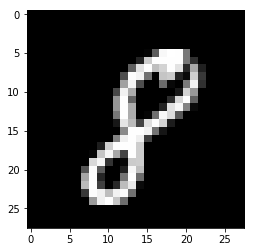

In [166]:
predicted = nn.feedforward(training_data[111][0])
print(np.argmax(predicted))
img = np.reshape(training_data[111][0], (28, 28))
plt.imshow(img, cmap='gray')

In [0]:
!pip install albumentations
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [171]:
!git clone https://github.com/Rodrigo-Burciaga/DataSets-and-Utils-NNDL.git

Cloning into 'DataSets-and-Utils-NNDL'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


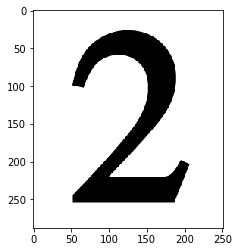

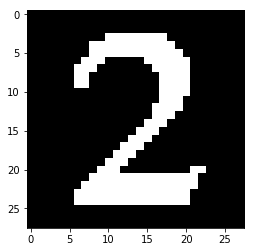

(28, 28)


In [187]:
img = cv2.imread('DataSets-and-Utils-NNDL/n_2.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()
img_rs = cv2.resize(img, (28,28))
ret, thresh = cv2.threshold(img_rs, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.show()
print(thresh.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


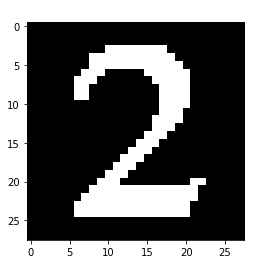

In [189]:
img_to_predict = np.reshape(thresh, (784,1))
predicted = nn.feedforward(img_to_predict)
img = np.reshape(img_to_predict, (28, 28))
title_obj = plt.title('Número: {}'.format(np.argmax(predicted)))
plt.setp(title_obj, color='w')  
plt.imshow(img, cmap='gray')
plt.show()